# CS471 --- Introduction to Artificial Intelligence
### Assignment 5 --- Linear and Logistic Regression
---
Salman Burhan

# **I. Linear Regression**
---
This model will be working with the *diabetes* data set included in the `sklearn.datasets` package.

## Import the *Diabetes* data helper

In [208]:
from sklearn.datasets import load_diabetes

## Load The *Diabetes* Data Set

In [209]:
diabetes = load_diabetes()

### A description of the data set.

In [210]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

### The data contained within the dataset (soon to become the `x` matrix).

In [211]:
print(diabetes.data)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04688253
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452873
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00422151
   0.00306441]]


### The target values contained within the dataset (soon to become the `y` matrix).

In [212]:
print(diabetes.target)

[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91. 116.  86. 122.
  72. 

### The names of the attributes or features of the dataset.

In [213]:
print(diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


### Setup The X and Y Matrices.

In [214]:
x, y = (diabetes.data, diabetes.target)

#### Verify the dimensions of the newly created matrices.

In [215]:
print(f'nD matrix x created of shape: {x.shape}')
print(f'nD matrix y created of shape: {y.shape}')

nD matrix x created of shape: (442, 10)
nD matrix y created of shape: (442,)


## Splitting the Data into Training and Testing Sets
---
We will be employing an *80:20 training-to-testing* ratio.

In [216]:
from sklearn.model_selection import train_test_split

In [217]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

### Verify dimensions and size of newly split data.

In [218]:
print(f'training set x_train created of size: {x_train.shape}')
print(f'training set y_train created of size: {y_train.shape}')

training set x_train created of size: (353, 10)
training set y_train created of size: (353,)


In [219]:
print(f'testing set x_test created of size: {x_test.shape}')
print(f'testing set y_test created of size: {y_test.shape}')

testing set x_test created of size: (89, 10)
testing set y_test created of size: (89,)


## Building the Linear Regression Model

### Import the relevant packages

In [220]:
from sklearn.linear_model import LinearRegression

### **Basic Model**

#### Define and Fit a Linear Regression Model

In [221]:
model = LinearRegression().fit(X = x_train, y = y_train)

#### *Model Inspection*

##### The *weight* assigned to each feature of the model.

In [222]:
feature_weights = dict(zip(diabetes.feature_names, model.coef_))
print(f'Feature {"Weight":>12}\n{"-"*20}')
for feature, weight in feature_weights.items():
    print(f'{feature.ljust(8)}{weight:>12.02f}')

Feature       Weight
--------------------
age             8.40
sex          -273.76
bmi           513.08
bp            342.61
s1           -841.29
s2            477.03
s3             89.06
s4            176.85
s5            787.58
s6             69.37


##### The *Equation* of The Model
---
The Equation of the Fitted Line Employed In The Linear Regression Model.

In [223]:
equation = '\n    + '.join([f'({weight:0.2f})({feature})' for feature, weight in feature_weights.items()])
print(f'Y =   {equation}')

Y =   (8.40)(age)
    + (-273.76)(sex)
    + (513.08)(bmi)
    + (342.61)(bp)
    + (-841.29)(s1)
    + (477.03)(s2)
    + (89.06)(s3)
    + (176.85)(s4)
    + (787.58)(s5)
    + (69.37)(s6)


#### Apply this *basic* model in order to make a prediction on the test set.

In [224]:
y_pred = model.predict(X = x_test)

### **Tuned Model**

In Basic Linear Regression, there exists no hyperparameters other than `fit_intercept`.
Setting this to `False`, its default being `True`, you are essentially telling the model to not calculate an intercept for the line.
This presumes that the data is preprocessed to be centered.
 > Setting this to `False` in this situation would result in a negative impact on model performance and accuracy.


Derivative models of Linear Regression such as Ridge or Lasso provide hyperparameters which may be tuned.

## Evaluating the Model's Performance
---
The Basic Linear Regression Model, as we previously established that the basic Linear Regression Model has no *real* hyperparameters to tune.

In [225]:
from sklearn.metrics import r2_score, mean_squared_error

##### The R^2 Score
---
The proportion of the variance for a dependent variable.

In [226]:
print(f'R^2 Score:\n{"-"*10}\n{r2_score(y_test, y_pred):10.2f}')

R^2 Score:
----------
      0.42


##### The Mean Squared Error
---
The average squared difference between the estimated values and the actual value.

In [227]:
print(f'Mean Squared Error:\n{"-"*19}\n{mean_squared_error(y_test, y_pred):19.2f}')

Mean Squared Error:
-------------------
            3470.87


##### Visualization
---

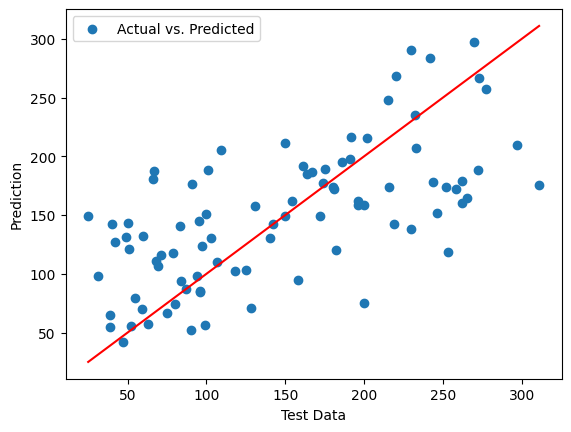

In [228]:
from matplotlib import pyplot

pyplot.scatter(y_test, y_pred, label='Actual vs. Predicted')
pyplot.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
pyplot.xlabel('Test Data')
pyplot.ylabel('Prediction')
pyplot.legend()
pyplot.show()


# **II. Logistic Regression**
---
This model will be working with the *Iris* dataset.

## Import the *Iris* data helper

In [229]:
from sklearn.datasets import load_iris

## Load the *Iris* Data Set

In [271]:
iris = load_iris()

### A description of the data set.

In [272]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### The data contained within the dataset (soon to become the `x` matrix).

In [273]:
print(iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

### The target values contained within the dataset (soon to become the `y` matrix).

In [274]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### The names of the attributes or features of the dataset.

In [275]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


### Setup The X and Y Matrices.

In [276]:
x, y = (iris.data, iris.target)

#### Verify the dimensions of the newly created matrices.

In [277]:
print(f'nD matrix x created of shape: {x.shape}')
print(f'nD matrix y created of shape: {y.shape}')

nD matrix x created of shape: (150, 4)
nD matrix y created of shape: (150,)


## Splitting the Data into Training and Testing Sets
---
We will be employing an *80:20 training-to-testing* ratio.

In [278]:
from sklearn.model_selection import train_test_split

In [279]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

#### Data Preprocessing: Standarize/Scale Features


In [280]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### Verify dimensions and size of newly split data.

In [281]:
print(f'training set x_train created of size: {x_train.shape}')
print(f'training set y_train created of size: {y_train.shape}')

training set x_train created of size: (120, 4)
training set y_train created of size: (120,)


In [282]:
print(f'testing set x_test created of size: {x_test.shape}')
print(f'testing set y_test created of size: {y_test.shape}')

testing set x_test created of size: (30, 4)
testing set y_test created of size: (30,)


## Building the Logistic Regression Model

### Import the relevant packages

In [241]:
from sklearn.linear_model import LogisticRegression

### **Basic Model**

#### Define and Fit a Logistic Regression Model

In [286]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs').fit(X = x_train, y = y_train)

#### *Model Inspection*

##### The *classes* of the model.

In [287]:
max_len = max([len(name) for name in iris.feature_names])

class_names = dict(zip(model.classes_, iris.target_names))
print(f'{"Class":{max_len}}\t{"Target".rjust(6)}\n{"-"*(max_len+13)}')
for target_value, class_name in class_names.items():
    print(f'{class_name:{max_len}}\t{target_value:>6}')

Class            	Target
------------------------------
setosa           	     0
versicolor       	     1
virginica        	     2


##### The *intercepts* of the model.

In [288]:
max_len = max([len(name) for name in iris.feature_names])
print(f'Intercepts\n{"-"*(max_len*2)}')
for target_class, intercept in dict(zip(iris.target_names, \
    [float(f'{intercept:0.2f}') for intercept in model.intercept_])).items():
    print(f'{target_class:{max_len}}\t{intercept:>10.2f}')

Intercepts
----------------------------------
setosa           	     -0.21
versicolor       	      1.88
virginica        	     -1.68


##### The *coefficients* of the model.

In [289]:
max_len = max([len(name) for name in iris.feature_names])

for target_class, features in dict(zip(iris.target_names, \
    [dict(zip(iris.feature_names, \
        [float(f'{coef:0.2f}') for coef in coefs])) \
            for coefs in model.coef_])).items():
    print(f'{target_class}\n{"-"*len(target_class)}')
    print(f'\t{"feature":{max_len}}\tcoef\n\t{"-"*(max_len+11)}')
    for feature, coef in features.items():
        print(f'\t{feature:{max_len}}{coef:>11.2f}')
    print()

setosa
------
	feature          	coef
	----------------------------
	sepal length (cm)      -1.01
	sepal width (cm)        1.13
	petal length (cm)      -1.79
	petal width (cm)       -1.67

versicolor
----------
	feature          	coef
	----------------------------
	sepal length (cm)       0.53
	sepal width (cm)       -0.36
	petal length (cm)      -0.36
	petal width (cm)       -0.71

virginica
---------
	feature          	coef
	----------------------------
	sepal length (cm)       0.48
	sepal width (cm)       -0.77
	petal length (cm)       2.15
	petal width (cm)        2.38



#### Apply this *basic* model in order to make a prediction on the test set.

In [290]:
y_pred = model.predict(X = x_test)

### **Tuned Model**

#### Evaluating The Best *Hyperparameter Combination*
---
Evaluating best choices of `C`: *inverse of regularization strength* and `max_iter`: *maximum number of iterations taken for the solvers to converge*.

Employ the default `cross-validation` spliting stragery of *5-fold*.

In [297]:
from sklearn.model_selection import GridSearchCV

hyperparameters = {
    'C':  [0.25, 25, 50, 100],
    'max_iter': [250, 500, 750, 1000]
}

grid_search = GridSearchCV(model, hyperparameters, cv=5, scoring='accuracy').fit(x_train, y_train)

#### Visualizing Performance Based on Hyperparameter Choices

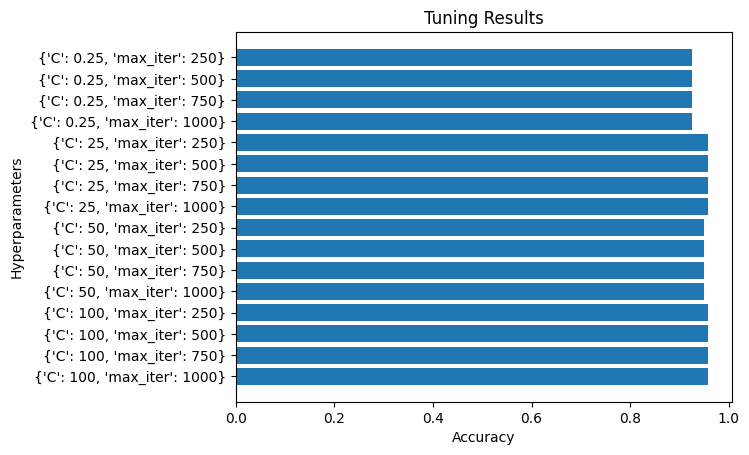

In [305]:
from matplotlib import pyplot

pyplot.barh([str(param) for param in grid_search.cv_results_['params']], \
            grid_search.cv_results_['mean_test_score'])

pyplot.xlabel('Accuracy')
pyplot.ylabel('Hyperparameters')
pyplot.title('Tuning Results')

pyplot.gca().invert_yaxis()
pyplot.show()

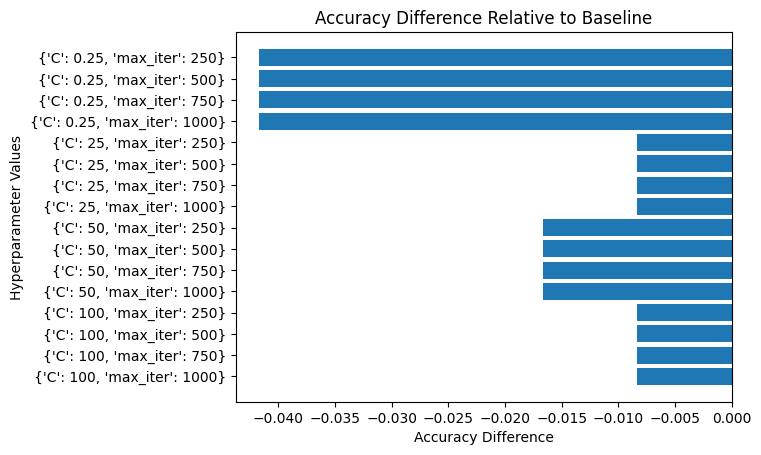

In [308]:
from matplotlib import pyplot

baseline = model.score(x_test, y_test)

pyplot.barh([str(param) for param in grid_search.cv_results_['params']], \
            [score - baseline for score in grid_search.cv_results_['mean_test_score']])

pyplot.xlabel('Accuracy Difference')

pyplot.ylabel('Hyperparameter Values')
pyplot.title('Accuracy Difference Relative to Baseline')

pyplot.gca().invert_yaxis()
pyplot.show()

#### The Best Hyperparameter Combination

In [309]:
grid_search.best_params_

{'C': 25, 'max_iter': 250}

#### Build and Fit Model with Newfound Hyperparameters

In [310]:
tuned_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', **grid_search.best_params_).fit(x_train, y_train)

#### *Model Inspection*

##### The *classes* of the model.
---
Remains Unchanged.

##### The *intercepts* of the model.

In [311]:
max_len = max([len(name) for name in iris.feature_names])
print(f'Intercepts\n{"-"*(max_len*2)}')
for target_class, intercept in dict(zip(iris.target_names, \
    [float(f'{intercept:0.2f}') for intercept in tuned_model.intercept_])).items():
    print(f'{target_class:{max_len}}\t{intercept:>10.2f}')

Intercepts
----------------------------------
setosa           	      0.23
versicolor       	      4.73
virginica        	     -4.97


##### The *coefficients* of the model.

In [312]:
max_len = max([len(name) for name in iris.feature_names])

for target_class, features in dict(zip(iris.target_names, \
    [dict(zip(iris.feature_names, \
        [float(f'{coef:0.2f}') for coef in coefs])) \
            for coefs in tuned_model.coef_])).items():
    print(f'{target_class}\n{"-"*len(target_class)}')
    print(f'\t{"feature":{max_len}}\tcoef\n\t{"-"*(max_len+11)}')
    for feature, coef in features.items():
        print(f'\t{feature:{max_len}}{coef:>11.2f}')
    print()

setosa
------
	feature          	coef
	----------------------------
	sepal length (cm)      -1.79
	sepal width (cm)        2.10
	petal length (cm)      -4.22
	petal width (cm)       -3.95

versicolor
----------
	feature          	coef
	----------------------------
	sepal length (cm)       1.34
	sepal width (cm)       -0.33
	petal length (cm)      -2.04
	petal width (cm)       -1.34

virginica
---------
	feature          	coef
	----------------------------
	sepal length (cm)       0.46
	sepal width (cm)       -1.77
	petal length (cm)       6.26
	petal width (cm)        5.29



#### Apply this *tuned* model in order to make a prediction on the test set.

In [313]:
tuned_y_pred = tuned_model.predict(X = x_test)

## Evaluating the Model's Performance

In [314]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### **Basic Model**

#### The probability of `x_test` values belonging to each class.

In [315]:
y_proba = model.predict_proba(x_test)
print(y_proba)
print(y_proba.shape)

[[9.53443303e-01 4.65556138e-02 1.08350934e-06]
 [8.97861958e-04 3.07440884e-01 6.91661254e-01]
 [9.54058524e-05 6.06827584e-02 9.39221836e-01]
 [1.50069324e-02 7.46265598e-01 2.38727469e-01]
 [8.39710485e-02 9.03668047e-01 1.23609048e-02]
 [7.30301936e-02 8.32543703e-01 9.44261030e-02]
 [9.38559168e-01 6.14390665e-02 1.76535247e-06]
 [1.99444851e-02 7.90792378e-01 1.89263137e-01]
 [8.89585560e-05 6.97568671e-02 9.30154174e-01]
 [1.28992902e-03 1.89216491e-01 8.09493580e-01]
 [9.69152217e-01 3.08452509e-02 2.53164251e-06]
 [1.83414337e-03 8.27773060e-01 1.70392796e-01]
 [9.75698239e-01 2.43013484e-02 4.12744531e-07]
 [9.80786370e-01 1.92134108e-02 2.19633098e-07]
 [9.54228181e-01 4.57712079e-02 6.11369822e-07]
 [5.90860919e-03 3.94294732e-01 5.99796659e-01]
 [5.17699144e-08 3.33083849e-03 9.96669110e-01]
 [9.64160299e-01 3.58392748e-02 4.26562607e-07]
 [9.86518352e-06 5.87562986e-02 9.41233836e-01]
 [9.70106149e-01 2.98932409e-02 6.10488020e-07]
 [3.18058444e-02 8.69835594e-01 9.835856

#### Confusion Matrix


In [316]:
print(confusion := confusion_matrix(y_test, y_pred))

[[10  0  0]
 [ 0 10  1]
 [ 0  0  9]]


#### Accuracy Score


In [317]:
print(f'Accuracy Score:\n{"-"*15}\n{accuracy_score(y_test, y_pred):15.2f}')

Accuracy Score:
---------------
           0.97


#### Classification Report


In [294]:
print(f'Classification Report:\n{"-"*22}\n{classification_report(y_test, y_pred)}')

Classification Report:
----------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.91      0.95        11
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



#### Visualization

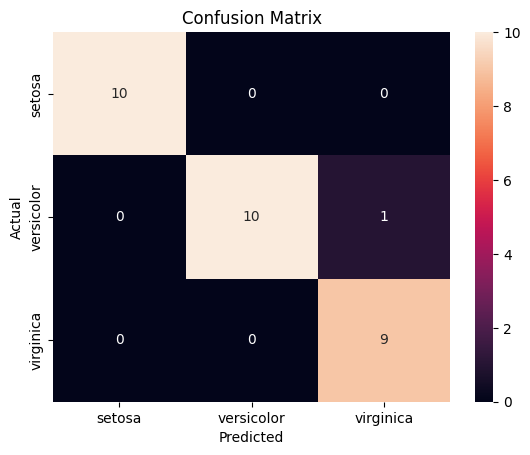

In [295]:
from matplotlib import pyplot
from seaborn import heatmap

heatmap(confusion, annot=True, xticklabels=iris.target_names, yticklabels=iris.target_names)
pyplot.xlabel('Predicted')
pyplot.ylabel('Actual')
pyplot.title('Confusion Matrix')
pyplot.show()


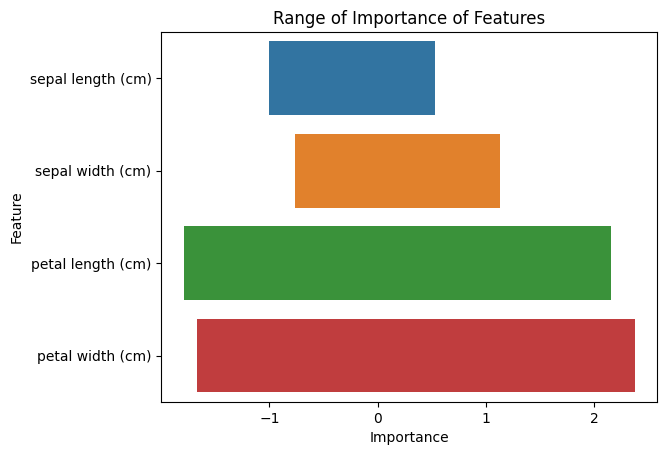

In [296]:
from matplotlib import pyplot
from pandas import DataFrame
from seaborn import barplot

for class_coef in model.coef_:
    barplot(x="Importance", y="Feature", data=DataFrame({"Feature": iris.feature_names, "Importance": class_coef}))
pyplot.title("Range of Importance of Features")
pyplot.show()


### **Tuned Model**

#### The probability of `x_test` values belonging to each class.

In [321]:
tuned_y_proba = tuned_model.predict_proba(x_test)
print(tuned_y_proba)
print(tuned_y_proba.shape)

[[9.97110949e-01 2.88905144e-03 3.06882358e-15]
 [1.42414757e-06 1.67738144e-01 8.32260432e-01]
 [6.59639651e-09 6.70712931e-03 9.93292864e-01]
 [3.49036920e-04 9.61072086e-01 3.85788771e-02]
 [1.70465437e-02 9.82918583e-01 3.48737205e-05]
 [8.04509237e-03 9.87535104e-01 4.41980369e-03]
 [9.94574342e-01 5.42565774e-03 7.41457037e-15]
 [3.79654707e-04 9.89697519e-01 9.92282617e-03]
 [3.98400809e-09 3.85290735e-03 9.96147089e-01]
 [1.70070438e-06 7.66415408e-02 9.23356759e-01]
 [9.97061840e-01 2.93815997e-03 2.33985543e-14]
 [1.01917962e-05 9.79317628e-01 2.06721801e-02]
 [9.99273636e-01 7.26364308e-04 3.99117346e-16]
 [9.98941979e-01 1.05802103e-03 5.44355260e-17]
 [9.97335402e-01 2.66459782e-03 6.60855600e-16]
 [5.72694086e-05 3.76347442e-01 6.23595288e-01]
 [2.32411781e-16 6.91616563e-07 9.99999308e-01]
 [9.97754761e-01 2.24523927e-03 2.12750193e-16]
 [4.46747938e-11 1.34534010e-03 9.98654660e-01]
 [9.98819726e-01 1.18027431e-03 9.73402618e-16]
 [1.68028929e-03 9.93400272e-01 4.919439

#### Confusion Matrix


In [320]:
print(tuned_confusion := confusion_matrix(y_test, tuned_y_pred))

[[10  0  0]
 [ 0 11  0]
 [ 0  0  9]]


#### Accuracy Score


In [319]:
print(f'Accuracy Score:\n{"-"*15}\n{accuracy_score(y_test, tuned_y_pred):15.2f}')

Accuracy Score:
---------------
           1.00


#### Classification Report


In [322]:
print(f'Classification Report:\n{"-"*22}\n{classification_report(y_test, tuned_y_pred)}')

Classification Report:
----------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



#### Visualization

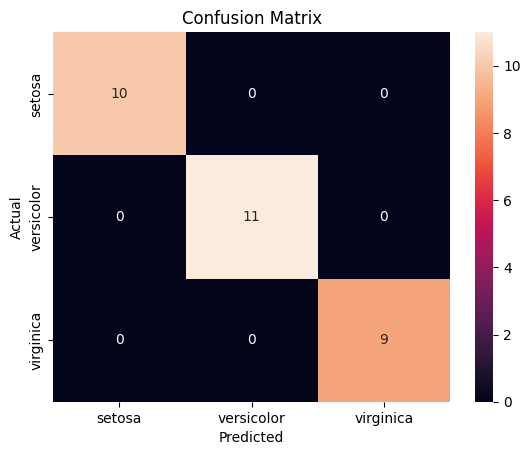

In [323]:
from matplotlib import pyplot
from seaborn import heatmap

heatmap(tuned_confusion, annot=True, xticklabels=iris.target_names, yticklabels=iris.target_names)
pyplot.xlabel('Predicted')
pyplot.ylabel('Actual')
pyplot.title('Confusion Matrix')
pyplot.show()


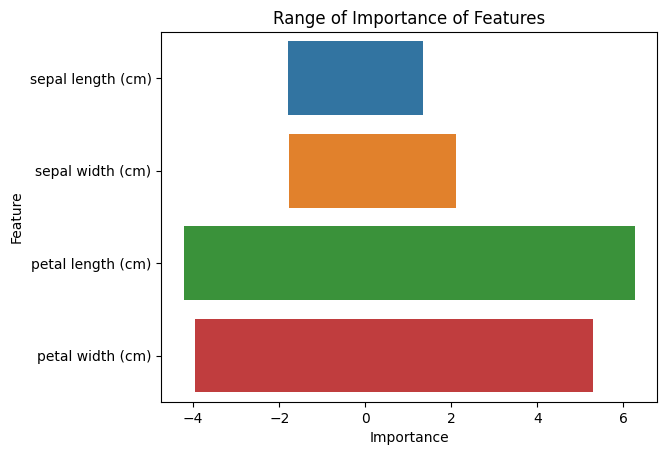

In [324]:
from matplotlib import pyplot
from pandas import DataFrame
from seaborn import barplot

for class_coef in tuned_model.coef_:
    barplot(x="Importance", y="Feature", data=DataFrame({"Feature": iris.feature_names, "Importance": class_coef}))
pyplot.title("Range of Importance of Features")
pyplot.show()
